# 6103 Tean project

## Drouvas Panagiotis, Dimos Giorgos, Kontoudakis Nikos, Vergas Panagiotis

In [93]:
#library import
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score, accuracy_score, precision_recall_fscore_support, precision_score, recall_score

### Part 1.

In [2]:
# libraries specifically for part 1
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.metrics import silhouette_samples
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

#future selection
from sklearn.feature_selection import mutual_info_classif

#k-means
from sklearn.cluster import KMeans

In [3]:
# based on kddcup.names from kaggle
collumnNames =  [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", 
    "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", 
    "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations", 
    "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", 
    "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate", 
    "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", 
    "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", 
    "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", 
    "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", 
    "dst_host_srv_rerror_rate", "label"
]

allData =pd.read_csv('kddcup.data_10_percent', header=None, names = collumnNames)
allData = allData.sample(frac = 0.07)
# last one is the label 
y_labels = allData.iloc[:, -1]
set(y_labels)

{'back.',
 'buffer_overflow.',
 'guess_passwd.',
 'imap.',
 'ipsweep.',
 'multihop.',
 'neptune.',
 'nmap.',
 'normal.',
 'phf.',
 'pod.',
 'portsweep.',
 'rootkit.',
 'satan.',
 'smurf.',
 'teardrop.',
 'warezclient.'}

In [4]:
# one hot encoding
data = pd.get_dummies(allData.iloc[:, 0:41], columns=["protocol_type", "service", "flag"])
dataColumns = data.columns
# normalize
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# reduce dimensions
# we will not use pca because we need to chatacterise the clusters
# pca = PCA(n_components=14)
# data = pca.fit_transform(data)

X_train, X_test, y_train, y_test = train_test_split(data, y_labels, test_size=0.3, random_state=13)

In [5]:
# information=mutual_info_classif(X_train,y_train)
# print('Information=',information)

## DBSCAN

### Loop to find best hyper paramters (Requires 32gb ram and a lot of time)

In [6]:
# evaluationMetricsDBSCAN = []
# # data = X_train.copy()
# print(len(data))
# for i in np.arange(4, 8, 2):
#     for x in [1, 1.5, 2]:  
#         db = DBSCAN(eps=x, min_samples=i).fit(data)
#         core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
#         core_samples_mask[db.core_sample_indices_] = True
#         labels = db.labels_
#         n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
#         if(len(set(labels))> 1 and n_clusters_ > 1):
#             silhouette_values = silhouette_samples(data, labels)
          
#             # print ('silhouette=', np.mean(silhouette_values))
#             # print('Estimated number of clusters: %d' % n_clusters_)
#             # print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(data, labels))

#             evaluationMetricsDBSCAN.append({'min_samples': i, 'eps': x, 'silhouette': round(np.mean(silhouette_values), 3), 'expected number of clusters': n_clusters_})
#         # else:
#             # print("no results for:", len(set(labels)),  n_clusters_)

34581


In [7]:
metricsDF = pd.DataFrame(evaluationMetricsDBSCAN)
sortedMetrics= metricsDF.sort_values(by=['silhouette'], ascending= False)
print(sortedMetrics[:4])
sortedMetrics= sortedMetrics.sort_values(by=['expected number of clusters'], ascending= True)
print(sortedMetrics[:4])

   min_samples  eps  silhouette  expected number of clusters
0            4  1.0       0.874                           85
3            6  1.0       0.871                           61
4            6  1.5       0.834                            9
1            4  1.5       0.825                           12
   min_samples  eps  silhouette  expected number of clusters
2            4  2.0       0.620                            2
5            6  2.0       0.635                            2
4            6  1.5       0.834                            9
1            4  1.5       0.825                           12


In [8]:
# once more with the best parameters (we choose something with few clusters)
db = DBSCAN(eps=1.5, min_samples=6).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

### Ploting

In [9]:
# n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# plt.figure('dbscan')

# unique_labels = set(labels)
# colors = [plt.cm.Spectral(each)
#           for each in np.linspace(0, 1, len(unique_labels))]
# for k, col in zip(unique_labels, colors):
#     if k == -1:
#         col = [0, 0, 0, 1]

#     class_member_mask = (labels == k)

#     # core nodes
#     xy = data[class_member_mask & core_samples_mask]
#     plt.plot(xy[:, 2], xy[:, 4], 'o', markerfacecolor=tuple(col),
#              markeredgecolor='k', markersize=5)

#     # border nodes
#     xy = data[class_member_mask & ~core_samples_mask]
#     plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
#              markeredgecolor='k', markersize=3)

# plt.title('Estimated number of clusters: %d' % n_clusters_)
# plt.show()
# # black is noise.

### dimension reduction (better ploting)

In [10]:
# Compute silhouette score
if len(set(labels)) > 1:
    silhouette_values = silhouette_samples(data, labels)
    print('Silhouette: ', round(np.mean(silhouette_values), 3))
else:
    print("Silhouette score not applicable (only one cluster detected)")

core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
            
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters: {n_clusters_}")

# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

Silhouette:  0.834
Number of clusters: 9


<Figure size 640x480 with 0 Axes>

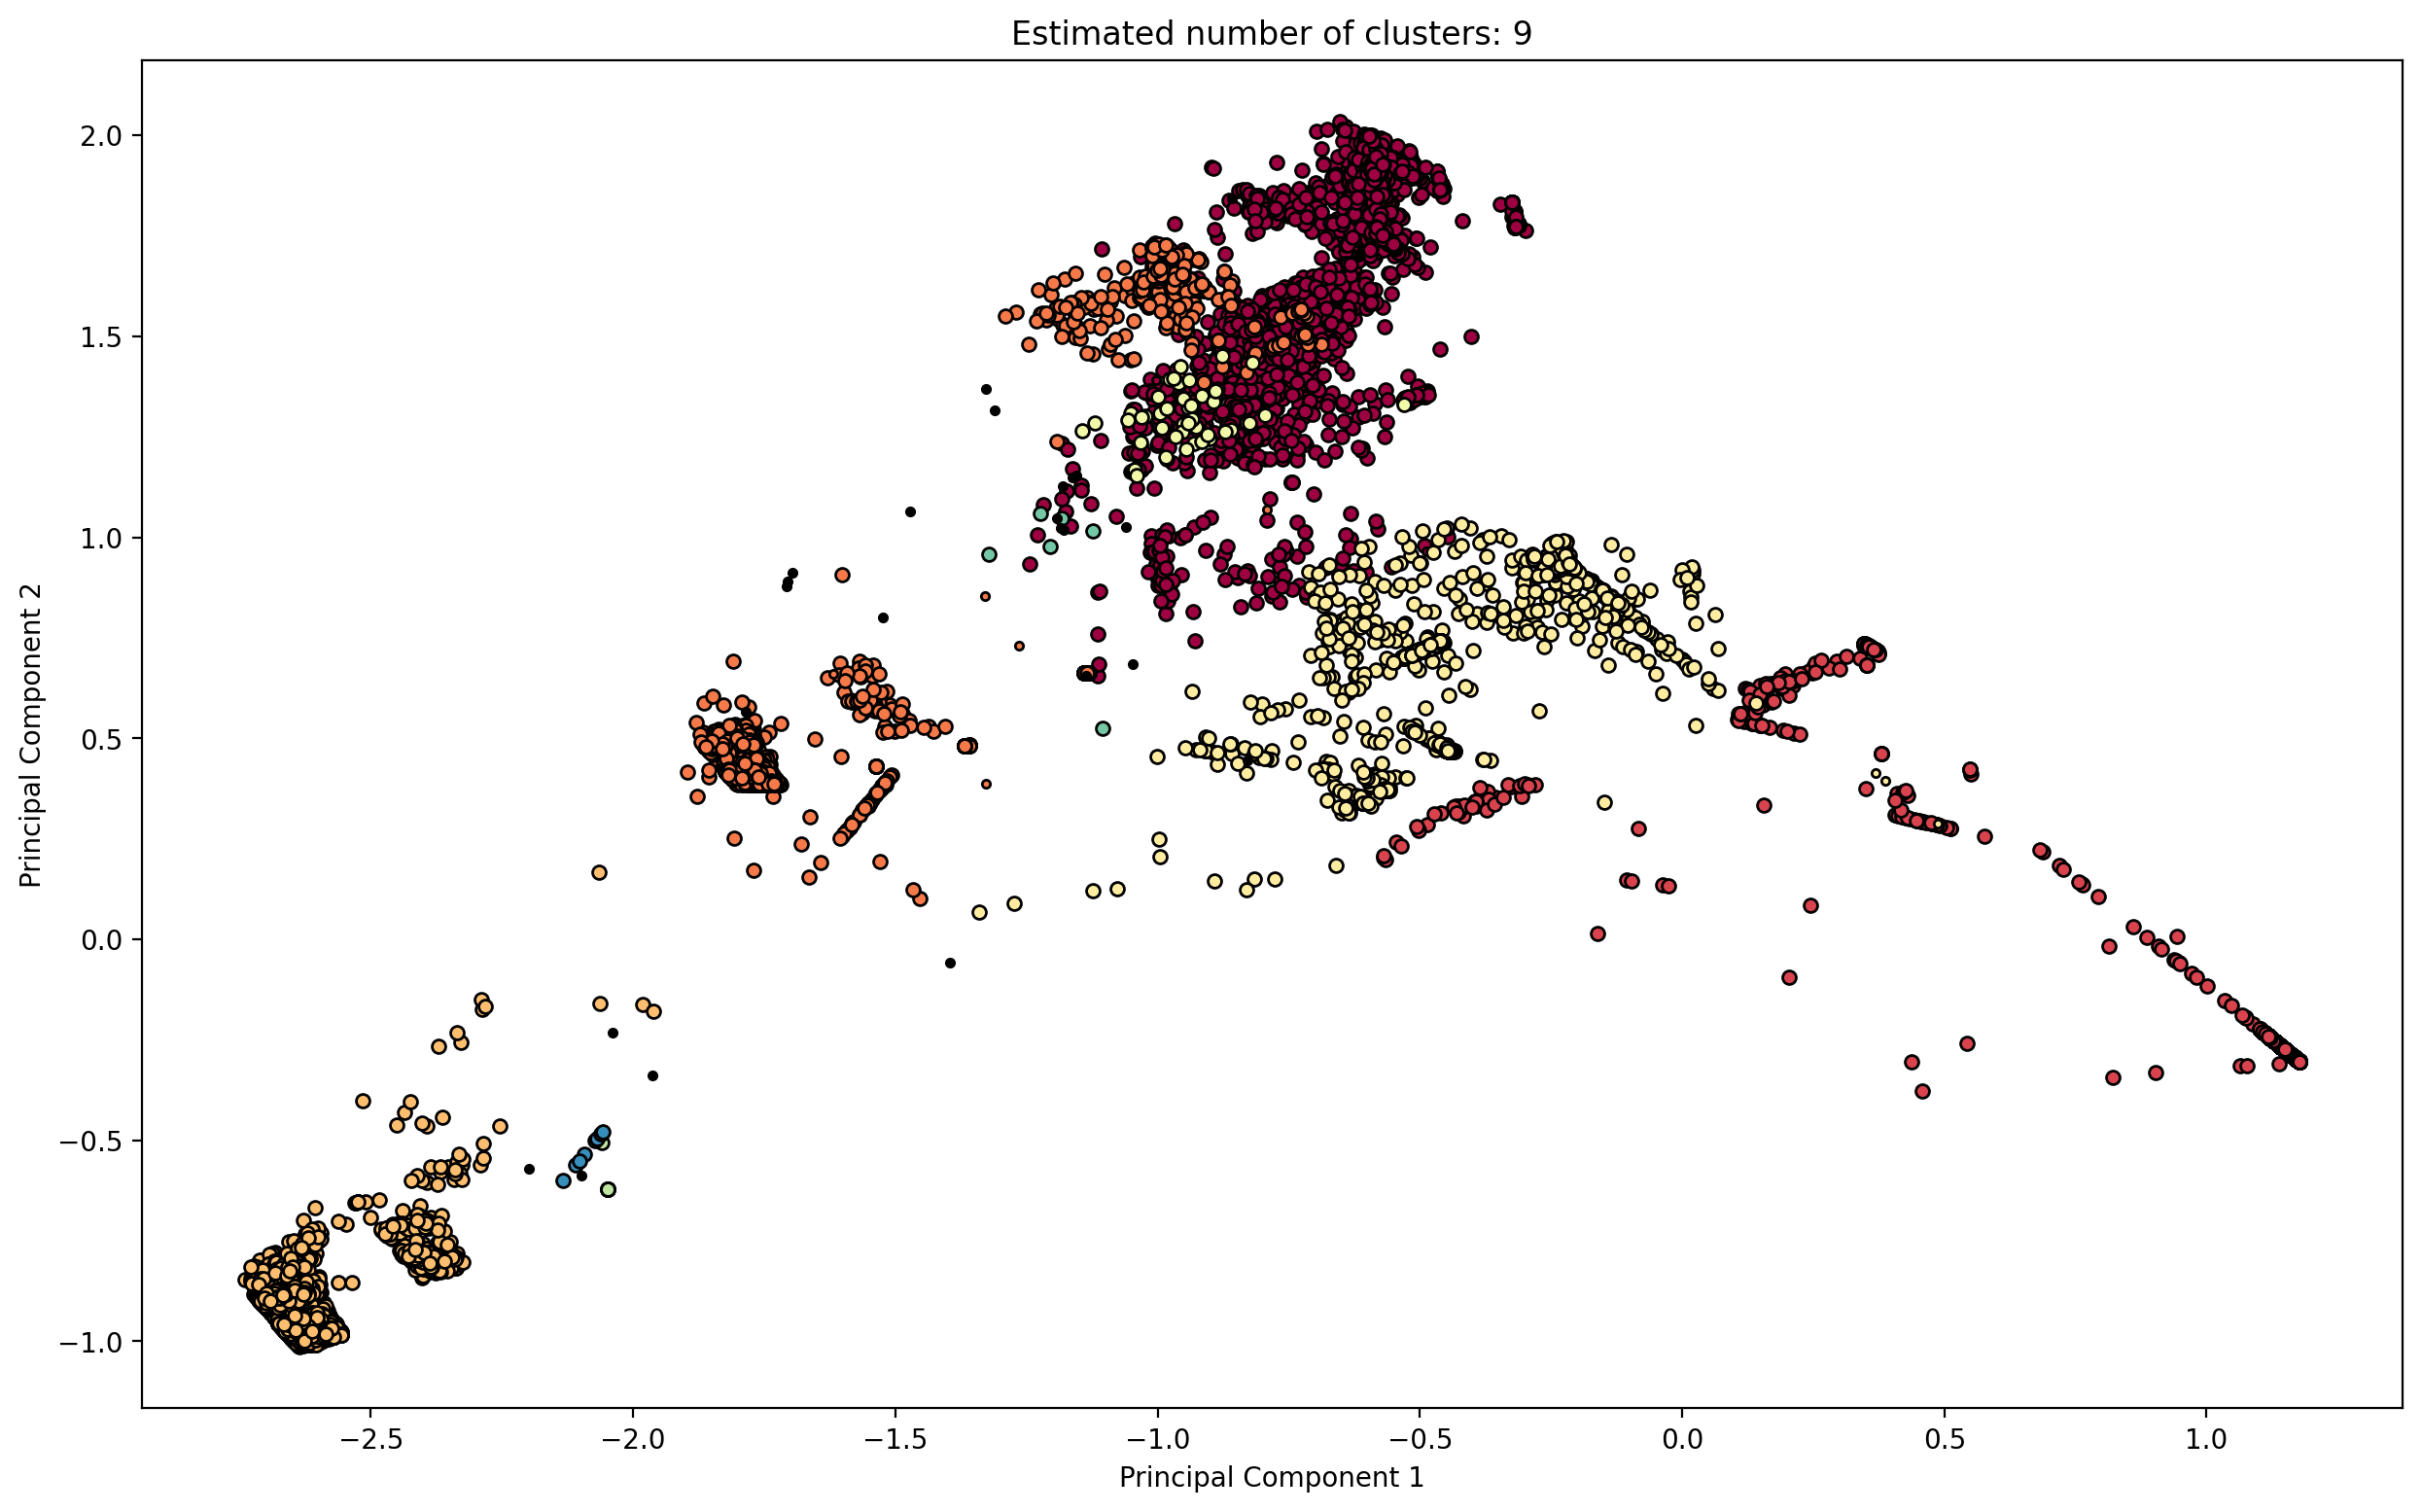

In [11]:
# #print with labels (slow but helps debugging and reports)
# plt.figure('pca-dbscan')
# plt.figure(figsize=(15, 9), dpi=200)
# unique_labels = set(labels)
# colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

# for k, col in zip(unique_labels, colors):
#     if k == -1:
#         col = [0, 0, 0, 1]  # Black for noise

#     class_member_mask = (labels == k)

#     # Core points
#     xy = data_2d[class_member_mask & core_samples_mask]
#     plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
#              markeredgecolor='k', markersize=5)

#     # Border points
#     xy = data_2d[class_member_mask & ~core_samples_mask]
#     plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
#              markeredgecolor='k', markersize=3)

#     # Annotate points with cluster labels
#     for i in np.where(class_member_mask)[0]:  # Get indices of current cluster points
#         plt.text(data_2d[i, 0], data_2d[i, 1], str(k), fontsize=10,
#                  color='black', ha='center', va='center')

# plt.title(f'Estimated number of clusters: {n_clusters_}')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.show()

# normal way of ploting
plt.figure('pca-dbscan')
plt.figure(figsize=(15, 9), dpi=200)
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black for noise

    class_member_mask = (labels == k)

    # Core points
    xy = data_2d[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=5)

    # Border points
    xy = data_2d[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)

plt.title(f'Estimated number of clusters: {n_clusters_}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show() 

In [12]:
# Get indices of noise points and print their features
noise_indices = np.where(db.labels_ == -1)[0]   
noise_points = data[noise_indices]
y_labels.iloc[noise_indices]

26757           normal.
42067        portsweep.
26692          ipsweep.
147938          normal.
84657           normal.
22789     guess_passwd.
26714          ipsweep.
22785     guess_passwd.
26729          ipsweep.
22760     guess_passwd.
26531          ipsweep.
484205          normal.
76316             imap.
369990       portsweep.
76314             imap.
104814          normal.
370058       portsweep.
22829        portsweep.
42074        portsweep.
371958          normal.
26616          ipsweep.
22754     guess_passwd.
26541           normal.
492277          normal.
138277          normal.
Name: label, dtype: object

# K-Means

In [13]:
allEvaluationMetrics = []
# we need low intertia and high silhouette
for i in  np.arange(2, 10, 1):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_train)
    y_kmeans = kmeans.predict(X_train)
    silhouette_values = silhouette_samples(X_train, y_kmeans)
    allEvaluationMetrics.append({'i': i, 'inertia': kmeans.inertia_, 'silhouette': np.mean(silhouette_values)})

allEvaluationMetrics

[{'i': np.int64(2),
  'inertia': 44306.82455140198,
  'silhouette': np.float64(0.6490335741477815)},
 {'i': np.int64(3),
  'inertia': 20430.68146813749,
  'silhouette': np.float64(0.7823101483975354)},
 {'i': np.int64(4),
  'inertia': 11417.247666888139,
  'silhouette': np.float64(0.8378966236737012)},
 {'i': np.int64(5),
  'inertia': 7981.075055071825,
  'silhouette': np.float64(0.8560303476115447)},
 {'i': np.int64(6),
  'inertia': 6684.404329623352,
  'silhouette': np.float64(0.8540119446871259)},
 {'i': np.int64(7),
  'inertia': 5973.728379447625,
  'silhouette': np.float64(0.8602338876826358)},
 {'i': np.int64(8),
  'inertia': 6098.329282819086,
  'silhouette': np.float64(0.8575996007970299)},
 {'i': np.int64(9),
  'inertia': 5176.749592769307,
  'silhouette': np.float64(0.8639811950956062)}]

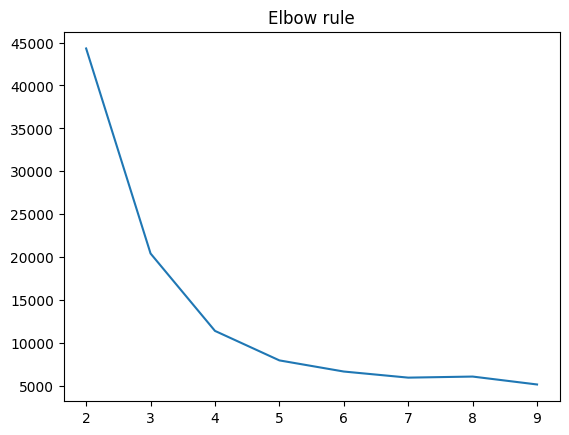

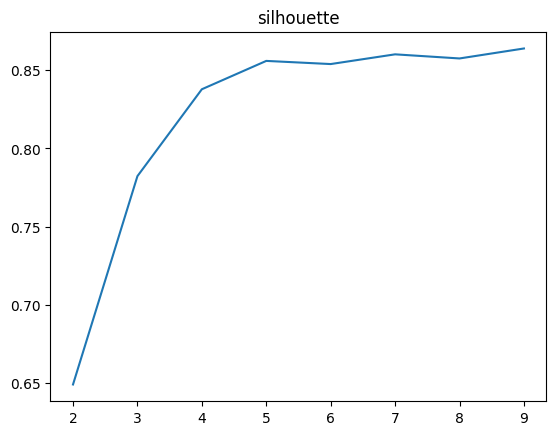

In [14]:
plt.figure('elbow km')
plt.title('Elbow rule')
plt.plot([d['i'] for d in allEvaluationMetrics], [x['inertia'] for x in allEvaluationMetrics])
plt.show()

plt.figure('silhouette km')
plt.title('silhouette')
plt.plot([d['i'] for d in allEvaluationMetrics], [x['silhouette'] for x in allEvaluationMetrics])
plt.show()

In [77]:
# we used the silhouette metric to pick a number of clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_train)
y_kmeans = kmeans.predict(X_test)
silhouette_values = silhouette_samples(X_test, y_kmeans)
print(silhouette_values)

[0.91329709 0.92992585 0.94934076 ... 0.73478569 0.99457177 0.93734525]


In [78]:
# Reduce dimensions to two for better ploting
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X_test)

<Figure size 640x480 with 0 Axes>

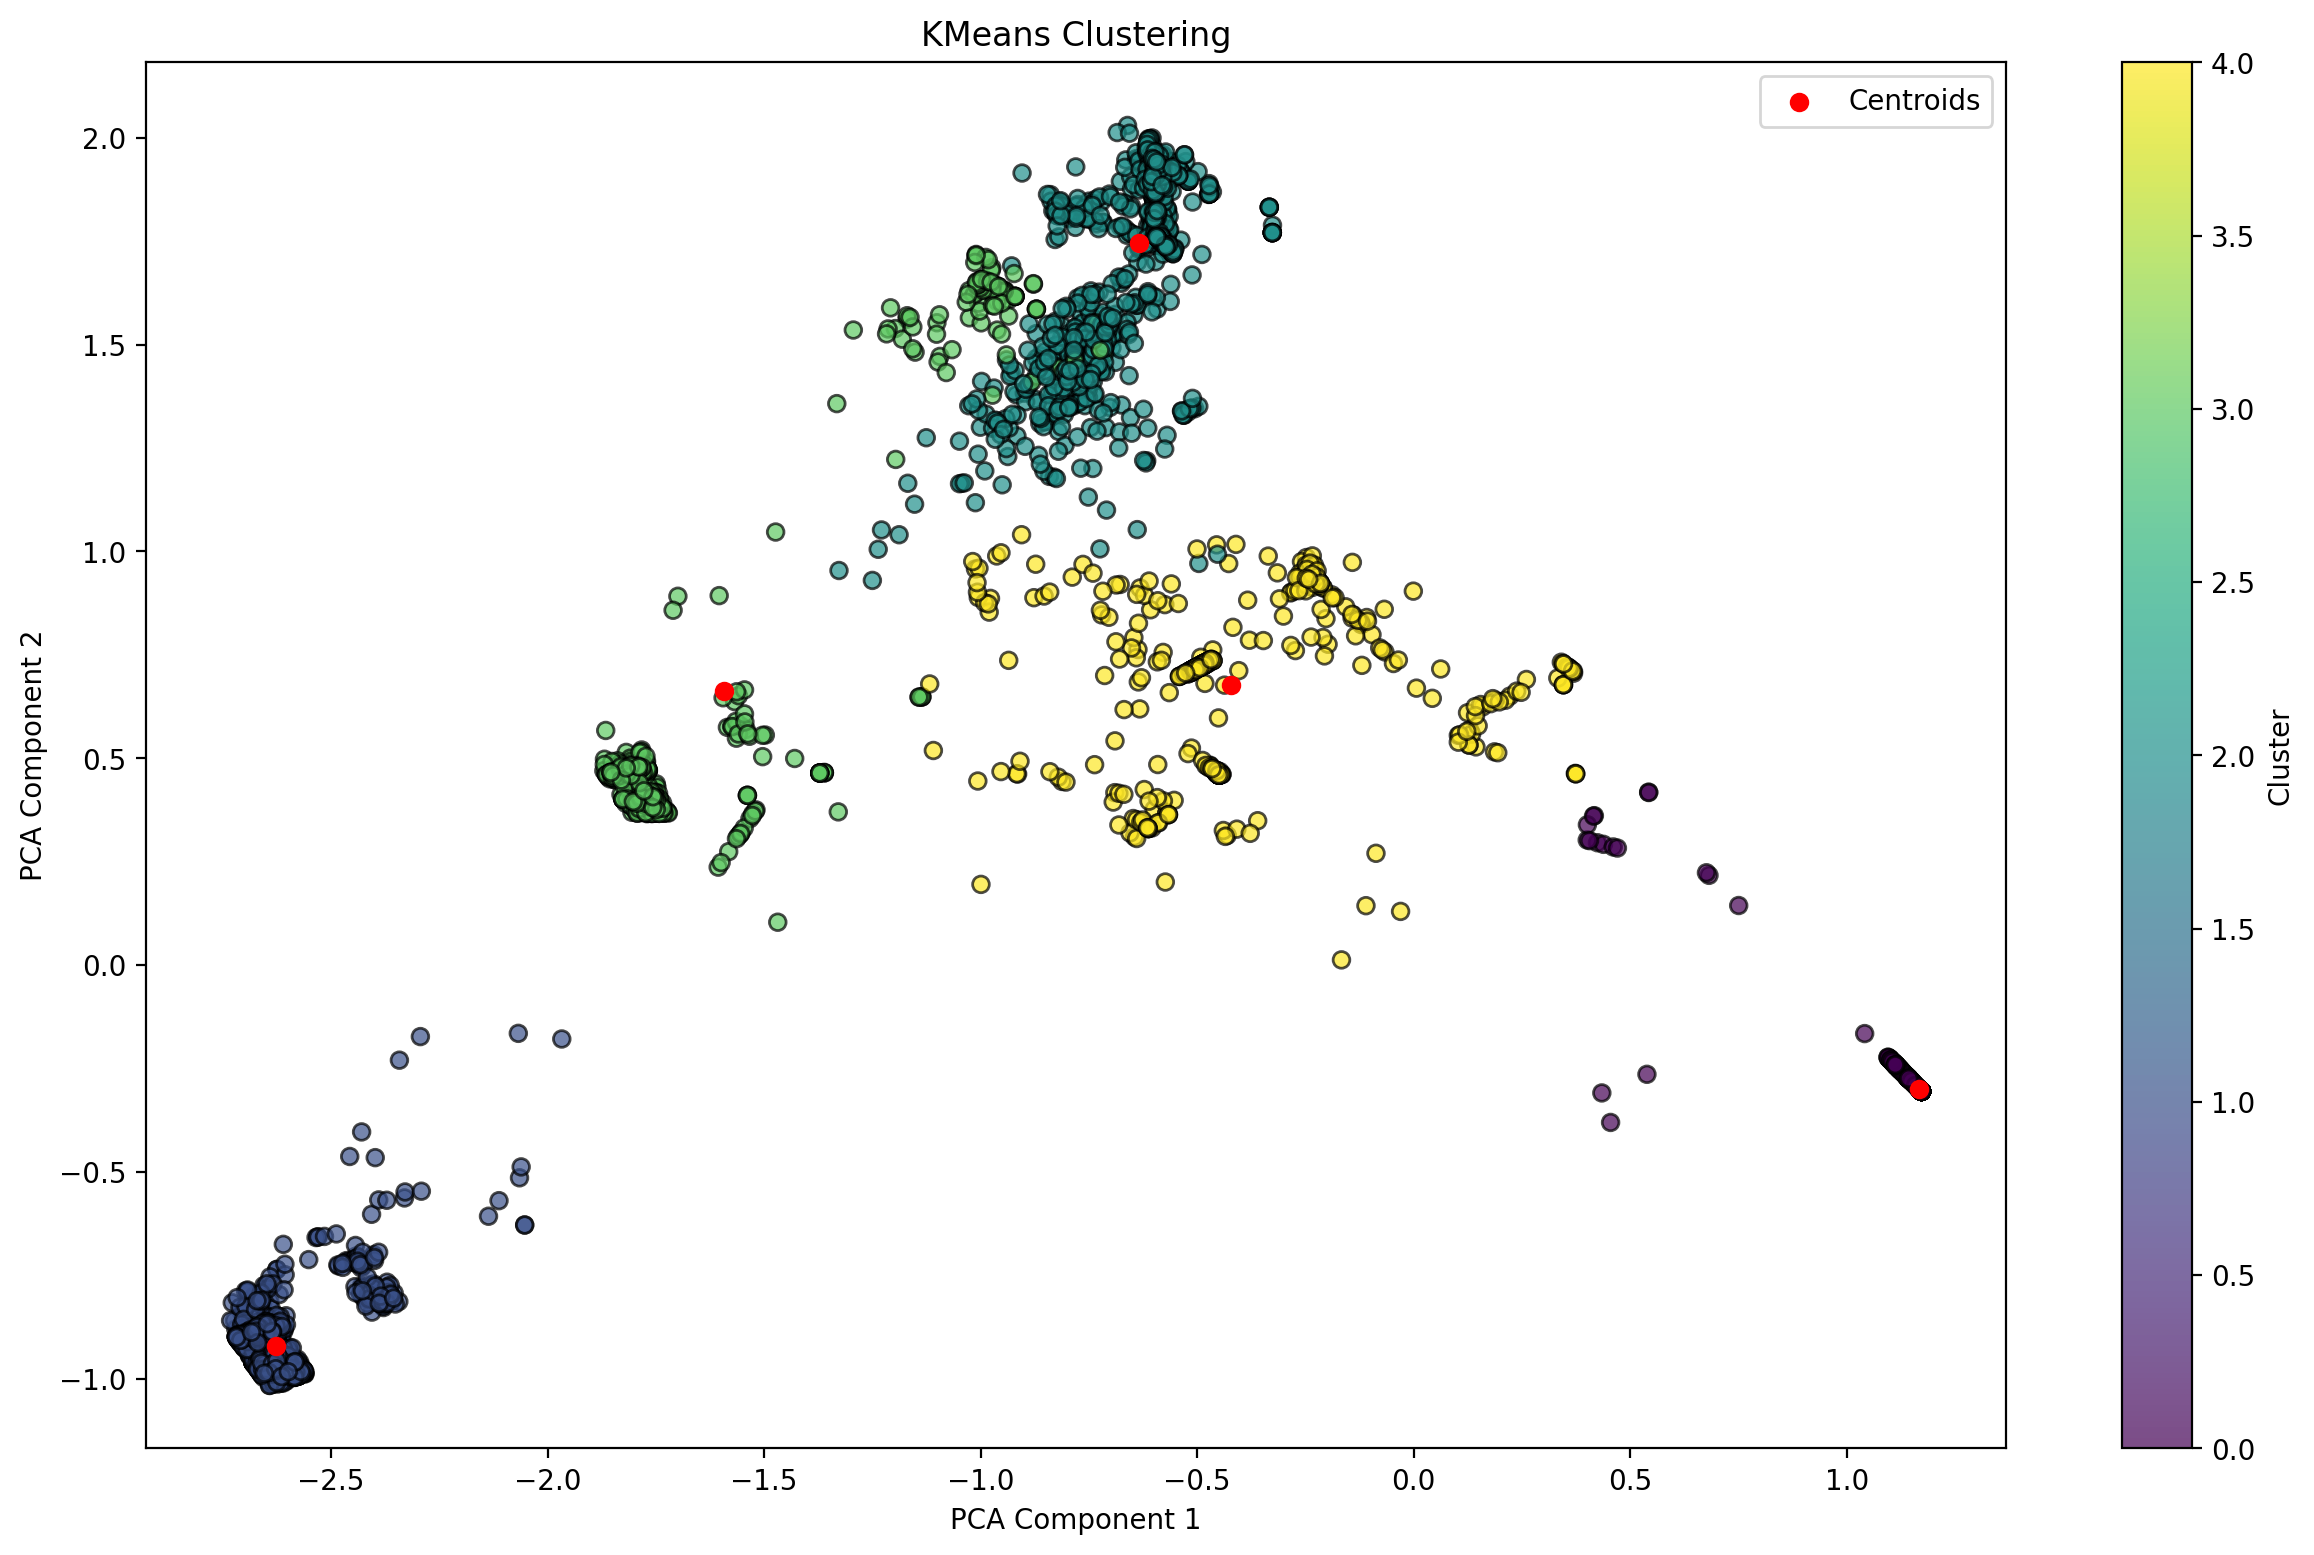

In [79]:
plt.figure('kmeans')
plt.figure(figsize=(15, 9), dpi=200)
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=y_kmeans, cmap='viridis', edgecolors='k', alpha=0.7)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], 
            pca.transform(kmeans.cluster_centers_)[:, 1], 
            c='red', marker='o', label='Centroids')  # Plot centroids
plt.colorbar(scatter, label="Cluster")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"KMeans Clustering")
plt.legend()
plt.show()

### print the labels on the plot

<Figure size 640x480 with 0 Axes>

/home/nikos/.local/share/pipx/venvs/jupyterlab/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


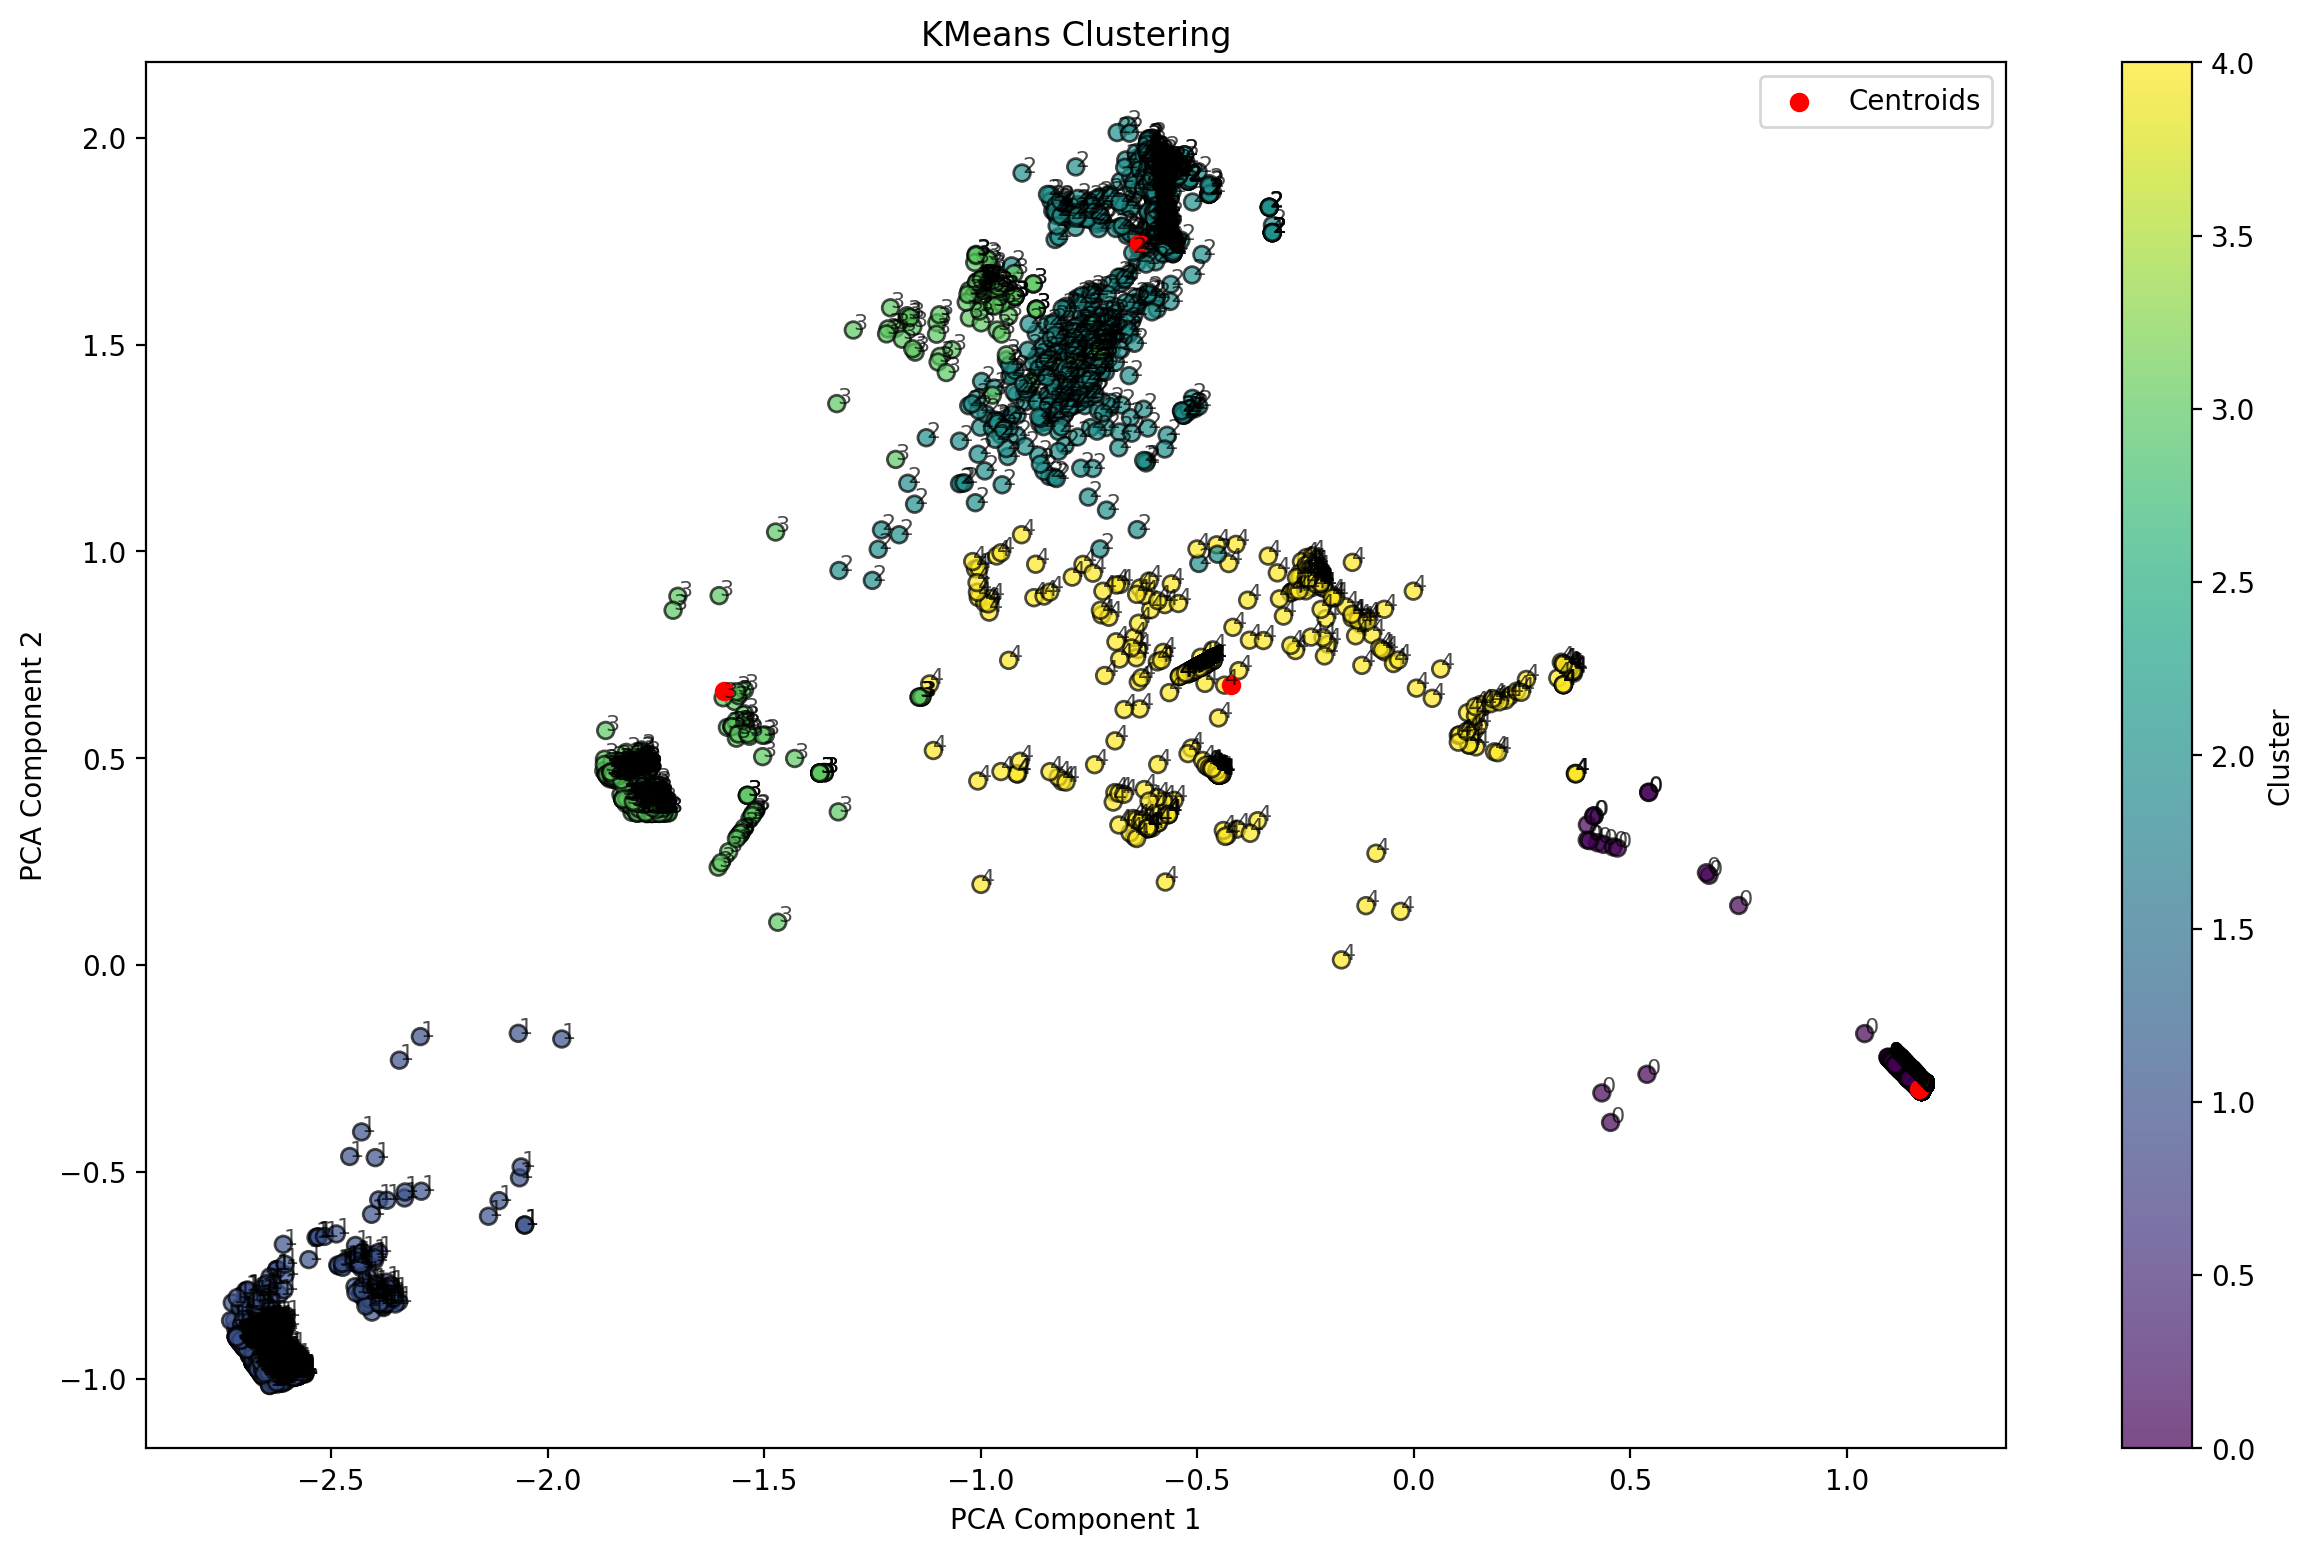

In [80]:
plt.figure('kmeans')
plt.figure(figsize=(15, 9), dpi=200)
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=y_kmeans, cmap='viridis', edgecolors='k', alpha=0.7)

# Annotate each point with its cluster label
for i, txt in enumerate(y_kmeans):
    plt.annotate(txt, (data_pca[i, 0], data_pca[i, 1]), fontsize=8, alpha=0.7)

# Plot centroids
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], 
            pca.transform(kmeans.cluster_centers_)[:, 1], 
            c='red', marker='o', label='Centroids')

plt.colorbar(scatter, label="Cluster")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"KMeans Clustering")
plt.legend()
plt.show()


In [28]:
# # characterize the clusters
# for i in range(0, 4):
#     idxCluster=np.where(kmeans.labels_==i)
#     plt.figure(f'characterization for cluster: {i}')
#     plt.figure(figsize=(15, 6), dpi=200)
#     plt.title(f'characterization for cluster: {i}')
#     # x-labels are turned 90 degrees
#     plt.xticks(rotation=90)
#     plt.boxplot(X_train[idxCluster], tick_labels=list(dataColumns))
#     plt.show()

### Possible outliers

In [48]:
# Detect possible abnormal behavior
# get the dbscan rows with -1
db_scan_noise_labeled = pd.DataFrame(noise_points, columns=dataColumns)
display(db_scan_noise_labeled.style.set_properties(**{'background-color': 'darkgrey', 'border': '1px solid black'}))

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pop_2,service_pop_3,service_printer,service_private,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_time,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_SF,flag_SH
0,0.000000,0.001214,0.000612,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.354331,0.291339,0.150000,0.780000,0.010000,0.030000,0.000000,0.000000,0.740000,0.010000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.188235,0.001961,0.750000,0.500000,0.250000,0.500000,0.020000,0.370000,0.000000,1.000000,0.003937,0.010000,0.140000,0.380000,0.000000,0.290000,0.500000,0.090000,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.271654,0.003937,0.010000,1.000000,0.010000,1.000000,0.000000,0.000000,0.910000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [81]:
# we need to display the rows labeled as '1'
kmeans_outliers_cluster_1 = pd.DataFrame(X_test[y_kmeans == 1], columns=dataColumns)
display(kmeans_outliers_cluster_1.head(20).style.set_properties(**{'background-color': 'darkgrey', 'border': '1px solid black'}))

# we need to display the rows labeled as '0'
kmeans_outliers_cluster_0 = pd.DataFrame(X_test[y_kmeans == 0], columns=dataColumns)
display(kmeans_outliers_cluster_0.head(20).style.set_properties(**{'background-color': 'darkgrey', 'border': '1px solid grey'}))

print(y_test[y_kmeans == 1])
print(y_test[y_kmeans == 0])

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pop_2,service_pop_3,service_printer,service_private,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_time,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_SF,flag_SH
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.201961,0.003922,1.000000,1.000000,0.000000,0.000000,0.030000,0.080000,0.000000,1.000000,0.007874,0.010000,0.080000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.321569,0.029412,1.000000,1.000000,0.000000,0.000000,0.100000,0.080000,0.000000,1.000000,0.059055,0.060000,0.070000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.217647,0.021569,1.000000,1.000000,0.000000,0.000000,0.110000,0.050000,0.000000,1.000000,0.043307,0.050000,0.040000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pop_2,service_pop_3,service_printer,service_private,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_time,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_SF,flag_SH
0,0.000000,0.000101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.901961,0.901961,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
1,0.000000,0.000201,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
2,0.000000,0.000101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.935294,0.935294,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

119122    neptune.
67090     neptune.
390059    neptune.
377975    neptune.
117326    neptune.
            ...   
384949    neptune.
394776    neptune.
386422    neptune.
392558    neptune.
351262    neptune.
Name: label, Length: 1832, dtype: object
399057    smurf.
322122    smurf.
410298    smurf.
446277    smurf.
442710    smurf.
           ...  
10023     smurf.
400098    smurf.
431499    smurf.
442363    smurf.
397296    smurf.
Name: label, Length: 5910, dtype: object


In [101]:
result = []
print(f"Total data points: {total_count_all}")
print(f"Total not normal: {not_normal_count_all}")
print()

for i in range(0, 5, 1):
    cluster_mask = (y_kmeans == i)
    y_true = y_test[cluster_mask]
    total_count = y_true.count()
    not_normal_count = (y_true != 'normal.').sum()

    y_true_binary = (y_true != 'normal.').astype(int)
    y_pred_binary = [1] * len(y_true_binary)  # assumes cluster i is labeled as "attack"
    precision = precision_score(y_true_binary, y_pred_binary, zero_division=0)

    result.append({
        'cluster': i,
        'cluster count': total_count,
        'attacks': not_normal_count,
        'precision': precision
    })
    
display(pd.DataFrame(result).round(3))

Total data points: 10375
Total not normal: 8309



,cluster,cluster count,attacks,precision
0,0,5910,5904,0.999
1,1,1832,1832,1.000
2,2,1571,66,0.042
3,3,559,445,0.796
4,4,503,62,0.123
